* Cơ sở dữ liệu “Adult” được Ronny Kohavi và Barry Becker (Data Mining and Visualization, Silicon Graphics) trích xuất từ cơ sở dữ liệu của cục điều tra dân số tại http://www.census.gov/ (http://www.census.gov/) vào năm 1994. Ban đầu nó được sử dụng để dự đoán liệu income có vượt quá 50 nghìn USD/năm hay không dựa trên dữ liệu điều tra dân số. Sau đó, CSDL đã được thu thập thêm thuộc tính income với các level small và large (>50K).
* Tiếp theo, bộ dữ liệu được dùng để tạo ra dữ liệu cho việc association mining (Xem thông tin chi tiết tại: https://rdrr.io/cran/arules/man/Adult.html (https://rdrr.io/cran/arules/man/Adult.html)). Và dữ liệu lúc này được lưu trong tập tin Adult_transactions.csv.
### Yêu cầu: Áp dụng thuật toán Apriori để tính toán mức độ kết hợp giữa các item
* Chuẩn hóa dữ liệu
* Áp dụng Apriori, Tìm kết quả
* Tìm kiếm thông tin từ kết quả: trong thông tin kết quả có 'hours-per-week=Full-time' không?
* Nếu có thì 'hours-per-week=Full-time' kết hợp với item nào?"
* Trực quan hóa dữ liệu
* Cho biết 10 mục xuất hiện nhiều nhất. Vẽ biểu đồ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv("../../Data/Adult_transactions.csv", index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 1 to 48842
Columns: 115 entries, age=Young to income=large
dtypes: bool(115)
memory usage: 5.7 MB


In [4]:
data.head()

,age=Young,age=Middle-aged,age=Senior,age=Old,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,...,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia,income=small,income=large
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
5,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
data.isnull().any()

age=Young                       False
age=Middle-aged                 False
age=Senior                      False
age=Old                         False
workclass=Federal-gov           False
                                ...  
native-country=United-States    False
native-country=Vietnam          False
native-country=Yugoslavia       False
income=small                    False
income=large                    False
Length: 115, dtype: bool

In [6]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets.head(3)

,support,itemsets
0,0.505119,(age=Middle-aged)
1,0.260862,(age=Senior)
2,0.694198,(workclass=Private)


In [7]:
frequent_itemsets.tail(3)

,support,itemsets
614,0.212440,"(race=White, capital-gain=None, hours-per-week..."
615,0.202592,"(race=White, sex=Male, relationship=Husband, m..."
616,0.274456,"(race=White, capital-gain=None, sex=Male, rela..."


In [8]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(age=Middle-aged),(workclass=Private),0.505119,0.694198,0.365669,0.723927,1.042825,0.015017,1.107686
1,(age=Middle-aged),(race=White),0.505119,0.855043,0.425351,0.842082,0.984842,-0.006547,0.917926
2,(age=Middle-aged),(capital-gain=None),0.505119,0.917387,0.463208,0.917028,0.999609,-0.000181,0.995678
3,(age=Middle-aged),(capital-loss=None),0.505119,0.953278,0.480079,0.950428,0.997010,-0.001440,0.942502
4,(age=Middle-aged),(native-country=United-States),0.505119,0.897424,0.448876,0.888655,0.990228,-0.004430,0.921239
...,...,...,...,...,...,...,...,...,...
3206,"(native-country=United-States, capital-loss=No...","(sex=Male, relationship=Husband, race=White, c...",0.383318,0.321240,0.274456,0.716003,2.228872,0.151319,2.390022
3207,"(relationship=Husband, race=White)","(capital-gain=None, sex=Male, marital-status=M...",0.365628,0.297838,0.274456,0.750644,2.520310,0.165559,2.815902
3208,"(relationship=Husband, capital-gain=None)","(race=White, sex=Male, marital-status=Married-...",0.355227,0.318230,0.274456,0.772622,2.427873,0.161412,2.998405
3209,"(native-country=United-States, relationship=Hu...","(race=White, capital-gain=None, sex=Male, mari...",0.363069,0.300295,0.274456,0.755935,2.517310,0.165429,2.866884


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(relationship=Husband),(marital-status=Married-civ-spouse),0.403669,0.458192,0.403423,0.999391,2.181164,0.218466,890.191004
1,(marital-status=Married-civ-spouse),(relationship=Husband),0.458192,0.403669,0.403423,0.880468,2.181164,0.218466,4.988894
2,(sex=Male),(relationship=Husband),0.668482,0.403669,0.403648,0.603828,1.495851,0.133803,1.505234
3,(relationship=Husband),(sex=Male),0.403669,0.668482,0.403648,0.999949,1.495851,0.133803,6536.208018
4,"(age=Middle-aged, relationship=Husband)",(marital-status=Married-civ-spouse),0.221469,0.458192,0.221244,0.998983,2.180273,0.119769,532.794560
...,...,...,...,...,...,...,...,...,...
1715,"(native-country=United-States, marital-status=...","(race=White, capital-gain=None, sex=Male, rela...",0.409545,0.297736,0.274456,0.670149,2.250821,0.152520,2.129038
1716,"(capital-loss=None, marital-status=Married-civ...","(race=White, capital-gain=None, sex=Male, rela...",0.429303,0.296937,0.274456,0.639308,2.153007,0.146981,1.949203
1717,(sex=Male),"(race=White, capital-gain=None, relationship=H...",0.668482,0.274477,0.274456,0.410567,1.495815,0.090974,1.230882
1718,(relationship=Husband),"(race=White, capital-gain=None, sex=Male, mari...",0.403669,0.276524,0.274456,0.679905,2.458752,0.162832,2.260188


In [10]:
print(rules.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         1720 non-null   object 
 1   consequents         1720 non-null   object 
 2   antecedent support  1720 non-null   float64
 3   consequent support  1720 non-null   float64
 4   support             1720 non-null   float64
 5   confidence          1720 non-null   float64
 6   lift                1720 non-null   float64
 7   leverage            1720 non-null   float64
 8   conviction          1720 non-null   float64
dtypes: float64(7), object(2)
memory usage: 121.1+ KB
None


In [11]:
# "Có relationship=hours-per-week=Full-time không? nó kết hợp với item nào?"
for row in rules.iterrows():
    if "hours-per-week=Full-time" in row[1][0]:
        print(row)

(38, antecedents           (hours-per-week=Full-time, marital-status=Marr...
consequents                                      (relationship=Husband)
antecedent support                                             0.249908
consequent support                                             0.403669
support                                                        0.214774
confidence                                                     0.859413
lift                                                            2.12901
leverage                                                       0.113894
conviction                                                      4.24173
Name: 38, dtype: object)
(39, antecedents           (relationship=Husband, hours-per-week=Full-time)
consequents                        (marital-status=Married-civ-spouse)
antecedent support                                            0.214877
consequent support                                            0.458192
support                          

In [12]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

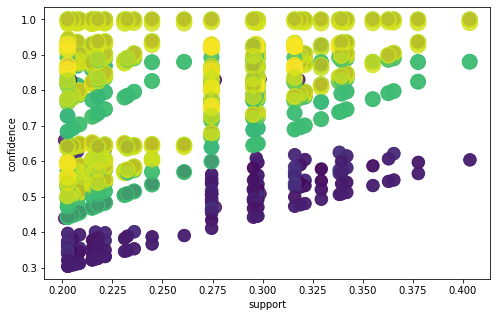

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(support, confidence, s= lift*100 ,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [14]:
result = data.apply(pd.value_counts).fillna(0)
result

,age=Young,age=Middle-aged,age=Senior,age=Old,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,...,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia,income=small,income=large
False,39215,24171,36101,47039,47410,45706,48832,14936,47147,44980,...,48821,48727,48777,48812,48815,5010,48756,48819,24122,41001
True,9627,24671,12741,1803,1432,3136,10,33906,1695,3862,...,21,115,65,30,27,43832,86,23,24720,7841


In [15]:
df_true = result.iloc[1,:]
df_true[:10]

age=Young                      9627
age=Middle-aged               24671
age=Senior                    12741
age=Old                        1803
workclass=Federal-gov          1432
workclass=Local-gov            3136
workclass=Never-worked           10
workclass=Private             33906
workclass=Self-emp-inc         1695
workclass=Self-emp-not-inc     3862
Name: True, dtype: int64

In [16]:
x = df_true.sort_values(ascending=False)

In [17]:
ten_ = x[:10]
ten_

capital-loss=None                    46560
capital-gain=None                    44807
native-country=United-States         43832
race=White                           41762
workclass=Private                    33906
sex=Male                             32650
hours-per-week=Full-time             28577
income=small                         24720
age=Middle-aged                      24671
marital-status=Married-civ-spouse    22379
Name: True, dtype: int64

In [18]:
pos = np.arange(len(ten_.values))

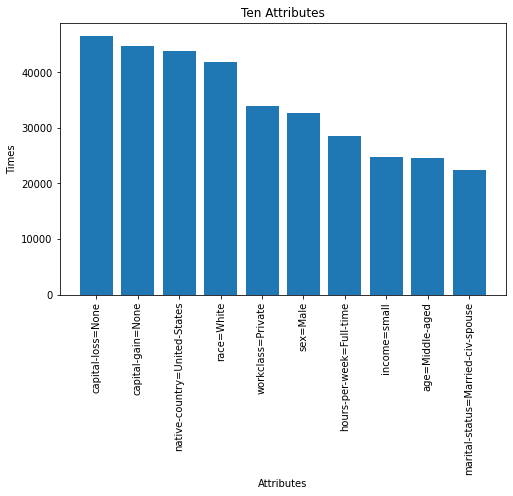

In [21]:
plt.figure(figsize=(8,5))

plt.bar(pos, ten_.values, align='center')
plt.xticks(pos, ten_.keys(), rotation='vertical')
plt.ylabel('Times')
plt.xlabel('Attributes')
plt.title('Ten Attributes')
plt.show()